https://youtu.be/WvoLTXIjBYU

Playlist from Sentdex: https://www.youtube.com/watch?v=j-3vuBynnOE&list=PLQVvvaa0QuDfhTox0AjmQ6tvTgMBZBEXN&index=2

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
%matplotlib inline

pickle_X = open("/home/tim/Documents/Data/X.pickle","rb")
X = pickle.load(pickle_X)

pickle_y = open("/home/tim/Documents/Data/y.pickle","rb")
y = pickle.load(pickle_y)


# import matplotlib.pyplot as plt
# import numpy as np
# import os
# import cv2
%matplotlib inline

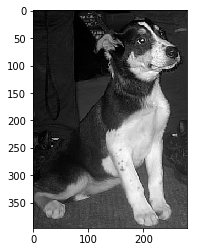

In [7]:
# Can find data-set for cats and dogs, here: https://bit.ly/2yQVbRc
DATADIR = "/home/tim/Documents/Data/PetImages"
CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category) # Path to cats or dog dir
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

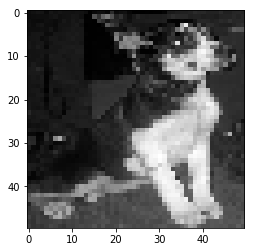

In [8]:
# Make every image the same shape
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()

In [9]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) # Path to cats or dog dir
        class_num = CATEGORIES.index(category) # Create category index - 0 for dog, 1 for cat
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_data()

In [10]:
print(len(training_data))

24946


In [11]:
# Shuffle the data
import random

random.shuffle(training_data)

In [12]:
for sample in training_data[:10]:
    print(sample[1])

0
1
0
1
0
1
1
1
0
0


In [13]:
X = []
y = []

In [14]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1,IMG_SIZE, IMG_SIZE, 1)

In [15]:
import pickle

pickle_out = open("/home/tim/Documents/Data/X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("/home/tim/Documents/Data/y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [16]:
pickle_in = open("/home/tim/Documents/Data/X.pickle","rb")
X = pickle.load(pickle_in)